# Introduction

Demonstrate customer segmentation using Machine Learning Concepts, such as Kmeans Clustering.

In [82]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

mall_customers = pd.read_csv('mall_customers.csv')
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Clean and reorganize data

In [83]:
mall_customers.describe()
# mall_customers = pd.get_dummies(data = mall_customers)

# mall_customers = mall_customers[['CustomerID', 'Age', 'Annual Income (k$)', 'Gender_Female', 'Gender_Male', 'Spending Score (1-100)']]
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

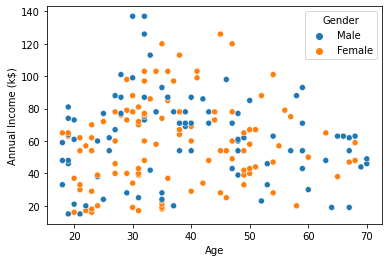

In [84]:
sns.scatterplot(data=mall_customers, x='Age', y='Annual Income (k$)', hue='Gender')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

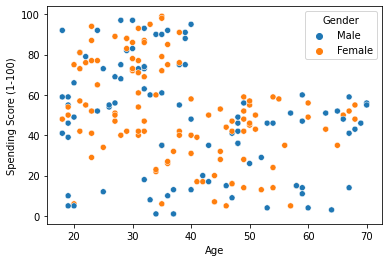

In [85]:
sns.scatterplot(data=mall_customers, x='Age', y='Spending Score (1-100)', hue='Gender')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

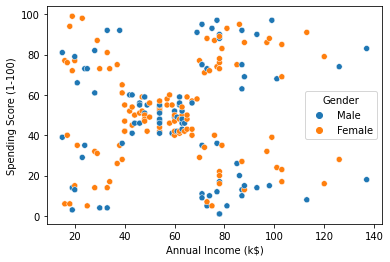

In [86]:
sns.scatterplot(data=mall_customers, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

## 1. Segmentation and KMeans using "Age" and "Spending Score"

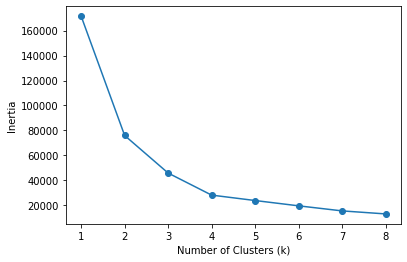

<Figure size 432x288 with 0 Axes>

In [87]:
from sklearn.cluster import KMeans

X = mall_customers[['Age', 'Spending Score (1-100)']].iloc[:, :].values

num_clusters = [i for i in range(1,9)]
inertias = []

for k in num_clusters:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()
plt.clf()



In [88]:
kmeans = KMeans(n_clusters = 4, random_state=27)

model = kmeans.fit_predict(X)


Text(0, 0.5, 'Spending Score (1-100)')

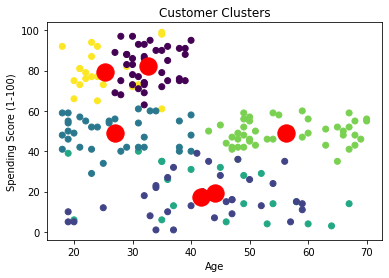

In [99]:
x = X[:,0]
y = X[:,1]


plt.scatter(x, y, c=model)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

## 2. Segmentation and KMeans using "Age" and "Annual Income"

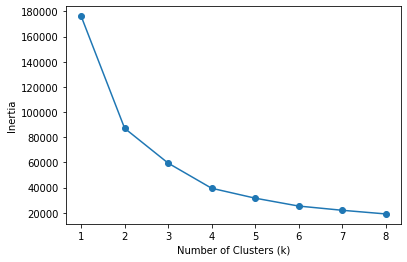

In [90]:
X = mall_customers[['Age', 'Annual Income (k$)']].iloc[:, :].values

num_clusters = [i for i in range(1,9)]
inertias = []

for k in num_clusters:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

In [91]:
kmeans = KMeans(n_clusters = 4, random_state=27)

model = kmeans.fit_predict(X)

Text(0, 0.5, 'Annual Income (k$)')

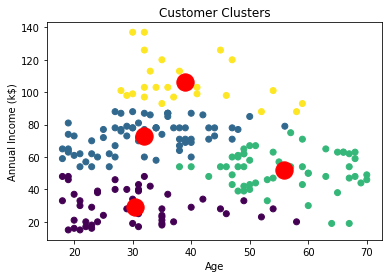

In [92]:
x = X[:,0]
y = X[:,1]

plt.scatter(x, y, c=model)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

## 3. Segmentation and KMeans using "Spending Score" and "Annual Income"

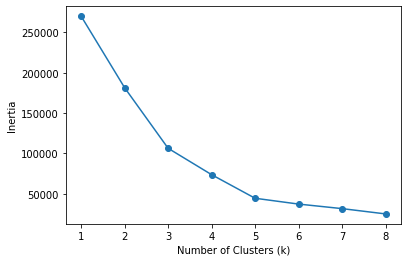

In [93]:
X = mall_customers[['Spending Score (1-100)', 'Annual Income (k$)']].iloc[:, :].values

num_clusters = [i for i in range(1,9)]
inertias = []

for k in num_clusters:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

Text(0, 0.5, 'Annual Income (k$)')

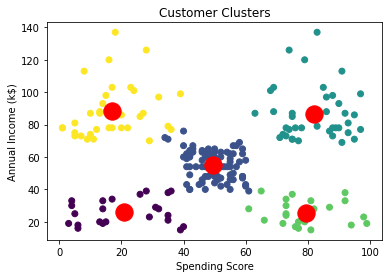

In [94]:
kmeans = KMeans(n_clusters = 5, random_state=27)

model = kmeans.fit_predict(X)

x = X[:,0]
y = X[:,1]

plt.scatter(x, y, c=model)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Customer Clusters')
plt.xlabel('Spending Score')
plt.ylabel('Annual Income (k$)')

## 4. Segmentation and KMeans using "Age", "Spending Score", and "Annual Income"

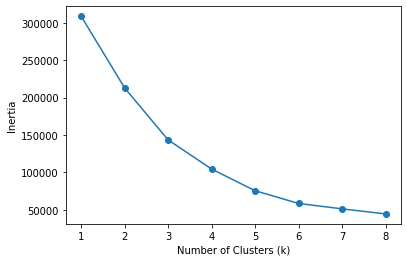

In [95]:
X = mall_customers[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].iloc[:, :].values

num_clusters = [i for i in range(1,9)]
inertias = []

for k in num_clusters:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    inertias.append(kmean.inertia_)

plt.plot(num_clusters, inertias, '-o')
 
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
 
plt.show()

Text(0.5, 0, 'Avg Income')

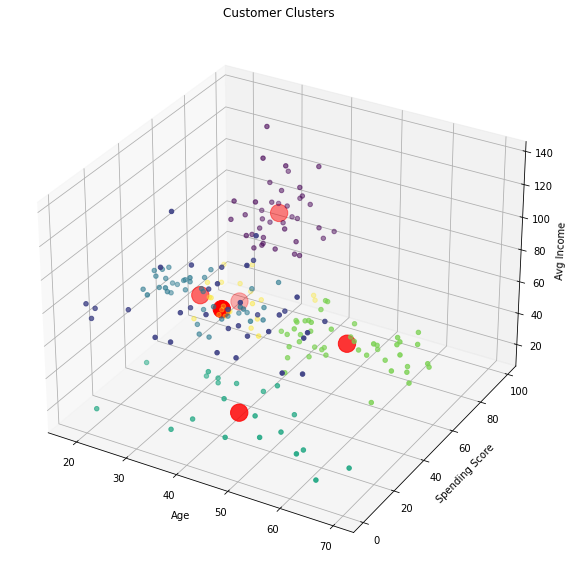

In [96]:
kmeans = KMeans(n_clusters = 6, random_state=27)

model = kmeans.fit_predict(X)

x = X[:,0]
y = X[:,1]
z = X[:,2]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c=model)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'red', label = 'Centroids')
ax.set_title('Customer Clusters')
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score')
ax.set_zlabel('Avg Income')


# Conclusion

Based on the data above, I would recommend that the mall does the following:

1. As illustrated by the KMeans cluster of Average Incomes and Spending score, there are a lot of customers in the middle average income and spending score. I believe the mall should try to target their marketing toward this group of mall patrons. Promos for products that are most popular for this group or advertising the stores that they frequent most often.

2. There is a large group of customers aged 35 - 50 that have a mid-to-high range of annual income but have low-to-mid spending score. More research should be done on this age group so that the mall can target ads and create promotionals for products they desire.
